Wrangle and Analyze Data Project: WeRateDogs by LOKKAN CHENG

This Data wrangling Project consists of:
Gathering data 
Assessing data
Cleaning data
Storing, analyzing, and visualizing my wrangled data

Project Overview


Real-world data rarely comes clean. Using Python and its libraries,
you will gather data from a variety of sources and in a variety of formats, 
assess its quality and tidiness, then clean it.
This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook,
plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates,
also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
These ratings almost always have a denominator of 10. The numerators, though?
Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? 
Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. 
This archive contains basic tweet data (tweet ID, timestamp, text, etc.) 
for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 
The Twitter archive is great, but it only contains very basic tweet information. 
Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.



We would first gathering the data, then assess them visually and progrmamatically for quality and tidiness issues. It will include eight quality issues and 2 tidness issues 

First Step : Gathering Data
1. twitter-archive-enhanced.csv 
2. image-predictions.tsv
3. Twitter API & JSON


Import the libies tht I need. Download and read the twitter_archive_enhanced.csv and its information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

In [2]:
# Read the twitter-archive-enhanced.csv

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# check the information and sort them by the timestamp

twitter_archive.sort_values('timestamp')
twitter_archive.head()  

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()  # get the detailed information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
twitter_archive.describe()    

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The Tweet image prediction. We would download it programatically. Below is its URL download link and we will then read and write the TSV file

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

And then use the consumer key and such . Twitter API & JSON

In [7]:
auth = tweepy.OAuthHandler('xxxxxx', 'Z3LFZV0NJPSC6n9pVCK4xqYjWXdRXbVXJCzlJvGSbdO28D6Hc8')
auth.set_access_token('1316973030237614080-oOVzXtG25hiwVLUlG54QCX4FoZKIdl', 'QkOccPwWh3wMNy1y8vSYMrxIjwjnCzefh4o0MVDe1OZOk')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
# create a list to store the tweet
list_of_tweets = []
# If the tweet cant be found, we will store it in the list: cant_find_tweets_ids
cant_find_tweets_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_ids.append(tweet_id)

Rate limit reached. Sleeping for: 744
Rate limit reached. Sleeping for: 743


In [9]:
# check the length of the list of the tweets

print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_ids))

The list of tweets 2331
The list of tweets no found 25


In [10]:

mydicts = []
for n in list_of_tweets:
    mydicts.append(n)

In [11]:
# write the list into a file called mydicts

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(mydicts, indent=4))


In [12]:
list1 = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data = json.load(json_file)
    for dict in data:
        tweet_id = dict['id']
        description= dict['text']
        http_url = description[description.find('https'):]
        favorite_count = dict['favorite_count']
        retweet_count = dict['retweet_count']
        followers_count = dict['user']['followers_count']
        friends_count = dict['user']['friends_count']
        source = dict['source']
        only_device = source[source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = dict['retweeted_status'] = dict.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = http_url
        else:
            retweeted_status = 'retweet'
            url = 'retweet'

        list1.append({'tweet_id': str(tweet_id),
                    'favorite_count': int(favorite_count),
                    'retweet_count': int(retweet_count),
                    'followers_count': int(followers_count),
                    'friends_count': int(friends_count),
                    'url': url,
                    'source': source,
                    'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(list1, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [13]:
tweet_json.info()
tweet_json.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35455,7486,8879821,19,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30678,5556,8879821,19,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23076,3679,8879821,19,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38736,7663,8879821,19,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37006,8264,8879821,19,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18651,2767,8879821,19,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10840,1797,8879821,19,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,59726,16757,8879821,19,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25674,3822,8879821,19,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29308,6506,8879821,19,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


Second Step: Accessing Data

In [14]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,boxer,0.539036,True,French_bulldog,0.317617,True,bull_mastiff,0.093928,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
584,678969228704284672,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1,Labrador_retriever,0.680251,True,Chesapeake_Bay_retriever,0.201697,True,golden_retriever,0.019676,True
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
32,666428276349472768,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,Pembroke,0.371361,True,chow,0.249394,True,Pomeranian,0.241878,True
316,671743150407421952,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
764,688916208532455424,https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg,1,Pembroke,0.430544,True,red_fox,0.206576,False,Pomeranian,0.154352,True
1073,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True,Leonberg,0.118089,True,bull_mastiff,0.066508,True


In [17]:
# check how many duplicated jpg_url in this dataset

sum(image_prediction.jpg_url.duplicated())

66

In [18]:
pd.concat(i for _, i in image_prediction.groupby("jpg_url") if len(i) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [19]:
# count the number of each img_num
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [20]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())



True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [21]:
# access the twitter_archive dataset information

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [25]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35455,7486,8879821,19,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30678,5556,8879821,19,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23076,3679,8879821,19,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38736,7663,8879821,19,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37006,8264,8879821,19,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18651,2767,8879821,19,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10840,1797,8879821,19,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,59726,16757,8879821,19,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25674,3822,8879821,19,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29308,6506,8879821,19,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [26]:
#check how many duplicated id in this dataset
sum(twitter_archive['tweet_id'].duplicated())

0

In [27]:
#count the value of each rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 121, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 45, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 27, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 17, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
1274    From left to right:\nCletus, Jerome, Alejandro...
Name: text, dtype: object
763    This is Sophie. She's a Jubilant Bush Pupper. ...
Name: text, dtype: object
55    @roushfenway These are good dogs but 17/10 is ...
Name: text, dtype: object


In [29]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 50, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 80, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 20, 'text'])


784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object


In [30]:
# check the numerator
twitter_archive[twitter_archive['tweet_id'] == 681340665377193000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [32]:
# count the original tweet and retweet value
tweet_json.retweeted_status.value_counts()

Original tweet    2168
retweet            163
Name: retweeted_status, dtype: int64

In [33]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [34]:

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


Third Step: Cleaning Data





1) Clean the first dataset: twitter_archive

Make a copy of the dataset frst and then use the following code to delete the retweets by filtering the retweeted_status_user_id that is showing NaN. Then we will print it and check the value counts

In [35]:
clean_twitter_archive = twitter_archive.copy()

In [36]:
clean_twitter_archive = clean_twitter_archive[pd.isnull(clean_twitter_archive['retweeted_status_user_id'])]
print(sum(clean_twitter_archive.retweeted_status_user_id.value_counts()))

0


2) We will delete the column that we dont need for this data analysis

In [37]:
clean_twitter_archive= clean_twitter_archive.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

In [38]:
#print the following code to check the header of the column after we clean it.
print(list(clean_twitter_archive))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


3) We want to separate the timestamp in today, month and year so that the data will look cleaner

In [39]:
#print the first few rows of it and how does the data look like before we clean it.
print(clean_twitter_archive.head())

             tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None 

In [40]:
# We will seperate the timestamp to "year","month","day" by using the to_datetime. The year, month and day will then divided into
# three new columns

clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])


clean_twitter_archive['year'] = clean_twitter_archive['timestamp'].dt.year
clean_twitter_archive['month'] = clean_twitter_archive['timestamp'].dt.month
clean_twitter_archive['day'] = clean_twitter_archive['timestamp'].dt.day

# As we already divide them into three columns and no longer needed the timestamp column, 
#we will now use the following code to drop the timestamp column 
clean_twitter_archive = clean_twitter_archive.drop('timestamp', 1)

In [41]:
# check the list of the data : clean_twitter_archieve after cleaning
list(clean_twitter_archive)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'year',
 'month',
 'day']

4.  clean the rating numerator and rating denominator

In [42]:
# convert them to float and then check their infomation

clean_twitter_archive[['rating_numerator', 'rating_denominator']] = clean_twitter_archive[['rating_numerator','rating_denominator']].astype(float)

clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 220.9+ KB


In [43]:
#update the numberators and check it
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75



with pd.option_context('max_colwidth', 200):
    display(clean_twitter_archive[clean_twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [44]:



clean_twitter_archive['rating'] = 10 * clean_twitter_archive['rating_numerator'] / clean_twitter_archive['rating_denominator'].astype(float)


clean_twitter_archive.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rating
1804,676946864479084545,This pups goal was to get all four feet as clo...,12.0,10.0,None,None,None,None,None,2015,12,16,12.0
370,828409743546925057,This is Mutt Ryan. He's quite confident at the...,12.0,10.0,Mutt,None,None,None,None,2017,2,6,12.0
205,852912242202992640,Meet Benny. He likes being adorable and making...,12.0,10.0,Benny,None,None,None,None,2017,4,14,12.0
2004,672466075045466113,This is Franq and Pablo. They're working hard ...,12.0,10.0,Franq,None,None,None,None,2015,12,3,12.0
660,791312159183634433,This is Mabel. She's super h*ckin smol. Portab...,12.0,10.0,Mabel,None,None,None,None,2016,10,26,12.0
1325,706166467411222528,This is Dexter. He's a shy pup. Doesn't bark m...,7.0,10.0,Dexter,None,None,None,None,2016,3,5,7.0
2088,670792680469889025,This is Antony. He's a Sheraton Tetrahedron. S...,7.0,10.0,Antony,None,None,None,None,2015,11,29,7.0
1070,740359016048689152,This is Chase. He's in a predicament. 9/10 hel...,9.0,10.0,Chase,None,None,None,None,2016,6,8,9.0
196,854732716440526848,This is Marlee. She fetched a flower and immed...,12.0,10.0,Marlee,None,None,None,None,2017,4,19,12.0
1998,672538107540070400,Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,7.0,10.0,Darby,None,None,None,None,2015,12,3,7.0


5. We are going to divide the dog types to columns:doggo , floofer, pupper and puppo columns

In [45]:
clean_twitter_archive= pd.melt(clean_twitter_archive, id_vars=['tweet_id', 
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name',
                                                                'year',
                                                                'month',
                                                                'day',
                                                                'rating',
                                                                  ],
                               var_name='dogs', value_name='dog_types')


clean_twitter_archive = clean_twitter_archive.drop('dogs', 1)


clean_twitter_archive= clean_twitter_archive.sort_values('dog_types').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [46]:
# print the value counts for each dog types
clean_twitter_archive['dog_types'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_types, dtype: int64

In [47]:
# check how does it looks like after you clean it

clean_twitter_archive

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_types
2095,667443425659232256,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,2015,11,19,6.0,None
2094,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,2015,11,19,11.0,None
2093,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,2015,11,19,7.0,None
2092,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,2015,11,19,11.0,None
2091,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,2015,11,19,7.0,None
2090,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,2015,11,20,9.0,None
2089,667502640335572993,Say hello to Hall and Oates. Oates is winking ...,11.0,10.0,Hall,2015,11,20,11.0,None
2088,667509364010450944,This a Norwegian Pewterschmidt named Tickles. ...,12.0,10.0,None,2015,11,20,12.0,None
2087,667517642048163840,This is Dook &amp; Milo. Dook is struggling to...,8.0,10.0,Dook,2015,11,20,8.0,None
2086,667524857454854144,Another topnotch dog. His name is Big Jumpy Ra...,12.0,10.0,None,2015,11,20,12.0,None


6.  update the denominator and numerators, there are five tweets their denominator are not equal to 10 and also delete five tweets that do not have act ratings

In [48]:


clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 716439118184652801), 'rating_denominator'] = 10

clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 666287406224695296), 'rating_numerator'] = 9
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 666287406224695296), 'rating_denominator'] = 10


clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 722974582966214656), 'rating_numerator'] = 13
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 722974582966214656), 'rating_denominator'] = 10

clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 740373189193256964), 'rating_numerator'] = 14
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 740373189193256964), 'rating_denominator'] = 10

clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 682962037429899265), 'rating_numerator'] = 10
clean_twitter_archive.loc[(clean_twitter_archive.tweet_id == 682962037429899265), 'rating_denominator'] = 10



clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['tweet_id'] != 682808988178739200]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['tweet_id'] != 832088576586297345]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['tweet_id'] != 682808988178739200]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['tweet_id'] != 682808988178739200]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['tweet_id'] != 810984652412424192]


with pd.option_context('max_colwidth', 200):
    display(clean_twitter_archive[clean_twitter_archive['rating_denominator'] != 10][['tweet_id',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator',
                                                                                      'rating',
                                                                                      'dog_types',]])

,tweet_id,rating_numerator,rating_denominator,rating,dog_types
3429,697463031882764288,44.0,40.0,11.000000,None
3631,684222868335505415,121.0,110.0,11.000000,None
3630,684225744407494656,143.0,130.0,11.000000,None
3594,686035780142297088,4.0,20.0,2.000000,None
3250,710658690886586372,80.0,80.0,10.000000,None
3225,713900603437621249,99.0,90.0,11.000000,None
3270,709198395643068416,45.0,50.0,9.000000,None
3347,704054845121142784,60.0,50.0,12.000000,None
3775,677716515794329600,144.0,120.0,12.000000,None
3839,675853064436391936,88.0,80.0,11.000000,None


In [49]:
# convert all int column in rating to float

clean_twitter_archive['rating'] = 10 * clean_twitter_archive['rating_numerator'] / clean_twitter_archive['rating_denominator'].astype(float)
clean_twitter_archive.sample(15)

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_types
502,795464331001561088,Elder doggo does a splash. Both 13/10 incredib...,13.0,10.0,None,2016,11,7,13.0,doggo
3382,700518061187723268,This is Vincent. He's the man your girl is wit...,10.0,10.0,Vincent,2016,2,19,10.0,None
2384,846139713627017216,SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,13.0,10.0,None,2017,3,26,13.0,None
2681,794332329137291264,This is Nimbus (like the cloud). He just bough...,12.0,10.0,Nimbus,2016,11,4,12.0,None
2924,756303284449767430,Pwease accept dis rose on behalf of dog. 11/10...,11.0,10.0,None,2016,7,22,11.0,None
2350,853299958564483072,This is Rumpole. He'll be your Uber driver thi...,13.0,10.0,Rumpole,2017,4,15,13.0,None
15,889278841981685760,This is Oliver. You're witnessing one of his m...,13.0,10.0,Oliver,2017,7,24,13.0,None
7043,793195938047070209,Say hello to Lily. She's pupset that her costu...,12.0,10.0,Lily,2016,10,31,12.0,puppo
3760,678424312106393600,This is Crystal. She's a shitty fireman. No se...,2.0,10.0,Crystal,2015,12,20,2.0,None
3650,683449695444799489,I just want to be friends with this dog. Appea...,10.0,10.0,None,2016,1,3,10.0,None


7. Clean the tweet_json data set. First make a copy of the tweet_json dataset and then check their info

In [50]:
clean_tweet_json = tweet_json.copy()

In [51]:
clean_tweet_json.info()
clean_tweet_json

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35455,7486,8879821,19,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30678,5556,8879821,19,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23076,3679,8879821,19,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38736,7663,8879821,19,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37006,8264,8879821,19,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18651,2767,8879821,19,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10840,1797,8879821,19,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,59726,16757,8879821,19,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25674,3822,8879821,19,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29308,6506,8879821,19,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [52]:

clean_tweet_json = clean_tweet_json[clean_tweet_json['retweeted_status'] == 'Original tweet']

clean_tweet_json['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

8. make a copy of the image_prediction data set and then drop any duplicated jpg_url. Then print it and check after we drop them

In [53]:
clean_image_prediction = image_prediction.copy()
clean_image_prediction = clean_image_prediction.drop_duplicates(subset=['jpg_url'], keep='last')
# check if there is any duplicated jpg_url
sum(clean_image_prediction['jpg_url'].duplicated())

0

In [54]:
clean_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [55]:
clean_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


9. create an image predtion column and a confidence level column

In [56]:
 
# we create a list here to store the confidence level and store the
# the first true prediction
Types_of_Dog = []
List_confidence = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def pic(clean_image_prediction):
    if clean_image_prediction['p1_dog'] == True:
        Types_of_Dog.append(clean_image_prediction['p1'])
        List_confidence.append(clean_image_prediction['p1_conf'])
    elif clean_image_prediction['p2_dog'] == True:
        Types_of_Dog.append(clean_image_prediction['p2'])
        List_confidence.append(clean_image_prediction['p2_conf'])
    elif clean_image_prediction['p3_dog'] == True:
        Types_of_Dog.append(clean_image_prediction['p3'])
        List_confidence.append(clean_image_prediction['p3_conf'])
    else:
        Types_of_Dog.append('Unknown')
        List_confidence.append('Unknown')

#    
clean_image_prediction.apply(pic, axis=1)

#creat the two new columns
clean_image_prediction['Types_of_Dog'] = Types_of_Dog
clean_image_prediction['List_confidence '] = List_confidence

# drop the rows that the list of type of dog is "Unknown"
clean_image_prediction = clean_image_prediction[clean_image_prediction['Types_of_Dog'] != 'Unknown']


clean_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id            1691 non-null int64
jpg_url             1691 non-null object
img_num             1691 non-null int64
p1                  1691 non-null object
p1_conf             1691 non-null float64
p1_dog              1691 non-null bool
p2                  1691 non-null object
p2_conf             1691 non-null float64
p2_dog              1691 non-null bool
p3                  1691 non-null object
p3_conf             1691 non-null float64
p3_dog              1691 non-null bool
Types_of_Dog        1691 non-null object
List_confidence     1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [57]:
# check the clean_image_prediction data set
clean_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Types_of_Dog,List_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


# double check the header of the clean image_prediciton and then delete the column that we dont need for analysis

In [58]:
print(list(clean_image_prediction ))




['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'Types_of_Dog', 'List_confidence ']


In [59]:

clean_image_prediction = clean_image_prediction.drop(['p1', 
                                                 'p1_conf', 
                                                 'p1_dog', 
                                                 'p2', 
                                                 'p2_conf', 
                                                 'p2_dog', 
                                                 'p3', 
                                                 'p3_conf', 
                                                 'p3_dog'], 1)
clean_image_prediction.head()


,tweet_id,jpg_url,img_num,Types_of_Dog,List_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


The Tidness issues:Below are the two tidenss that we would need to fix.
 - we need to convert the tweet id in the clean_tweet_json dataset to integer so that we can merge it with the other 2 tables later
 - Then we will meger them in one dataset


In [60]:
# Convert the tweet id to int as it is showing as object
clean_tweet_json.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2168 non-null object
favorite_count      2168 non-null int64
retweet_count       2168 non-null int64
followers_count     2168 non-null int64
friends_count       2168 non-null int64
source              2168 non-null object
retweeted_status    2168 non-null object
url                 2168 non-null object
dtypes: int64(4), object(4)
memory usage: 152.4+ KB


In [61]:
clean_tweet_json['tweet_id'] = clean_tweet_json['tweet_id'].astype(int)

clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2168 non-null int64
favorite_count      2168 non-null int64
retweet_count       2168 non-null int64
followers_count     2168 non-null int64
friends_count       2168 non-null int64
source              2168 non-null object
retweeted_status    2168 non-null object
url                 2168 non-null object
dtypes: int64(5), object(3)
memory usage: 152.4+ KB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
# now we can confirm that the tweet_id data type is integer
# Now we are going to merge the clean_twiiter_archive and the clean_image_prediction


df_new = pd.merge(clean_twitter_archive, 
                      clean_image_prediction, 
                      how = 'left', on = ['tweet_id'])

#keep the rows that have jpg_url
df_new= df_new[df_new['jpg_url'].notnull()]

df_new.info()
df_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2171
Data columns (total 14 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
dog_types             1625 non-null object
jpg_url               1625 non-null object
img_num               1625 non-null float64
Types_of_Dog          1625 non-null object
List_confidence       1625 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 190.4+ KB


,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_types,jpg_url,img_num,Types_of_Dog,List_confidence
1,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,2015,11,19,11.0,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.82567
2,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,2015,11,19,7.0,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,Tibetan_terrier,0.676376
3,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,2015,11,19,11.0,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,toy_poodle,0.304175
4,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,2015,11,19,7.0,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,borzoi,0.852088
5,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,2015,11,20,9.0,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1.0,Chihuahua,0.143957


# create a dataframe that includes the df_new and clean_tweet_json

In [63]:

df_new2 = pd.merge(df_new, clean_tweet_json, 
                      how = 'left', on = ['tweet_id'])


df_new2.info()
df_new2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 21 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
dog_types             1625 non-null object
jpg_url               1625 non-null object
img_num               1625 non-null float64
Types_of_Dog          1625 non-null object
List_confidence       1625 non-null object
favorite_count        1619 non-null float64
retweet_count         1619 non-null float64
followers_count       1619 non-null float64
friends_count         1619 non-null float64
source                1619 non-null object
retweeted_status      1619 non-null object
url                   1619 no

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_types,...,img_num,Types_of_Dog,List_confidence,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,2015,11,19,11.0,None,...,1.0,Labrador_retriever,0.82567,293.0,81.0,8879835.0,19.0,Twitter Web Client,Original tweet,https://t.co/6uLCWR9Efa
1,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,2015,11,19,7.0,None,...,1.0,Tibetan_terrier,0.676376,179.0,56.0,8879835.0,19.0,Twitter Web Client,Original tweet,https://t.co/uLzRi1drVK
2,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,2015,11,19,11.0,None,...,1.0,toy_poodle,0.304175,235.0,89.0,8879835.0,19.0,Twitter Web Client,Original tweet,https://t.co/J4vn2rOYFk
3,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,2015,11,19,7.0,None,...,1.0,borzoi,0.852088,486.0,208.0,8879835.0,19.0,Twitter Web Client,Original tweet,https://t.co/ITxxcc4v9y
4,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,2015,11,20,9.0,None,...,1.0,Chihuahua,0.143957,489.0,245.0,8879835.0,19.0,Twitter Web Client,Original tweet,https://t.co/5NhPV8E45i


Storing, Analyzing And Visualizing Data

In [ ]:
#store the df_new2 to a csv file

In [64]:
df_new2.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [65]:
# First insight we want to check which dog type has the most count in the data set
df_new2['Types_of_Dog'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
Staffordshire_bullterrier          20
Cardigan                           19
Shetland_sheepdog                  19
Maltese_dog                        19
Rottweiler                         19
beagle                             19
kuvasz                             18
Italian_greyhound                  17
basset      

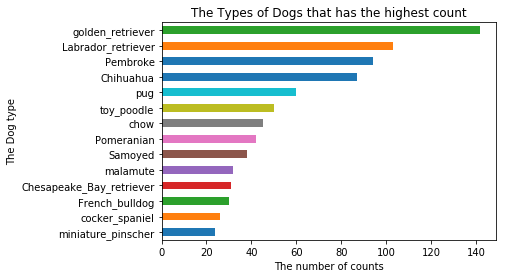

In [66]:
df_Types_of_Dog = df_new2.groupby('Types_of_Dog').filter(lambda x: len(x) >= 23)

df_Types_of_Dog['Types_of_Dog'].value_counts().sort_values().plot(kind = 'barh')
plt.title('The Types of Dogs that has the highest count')
plt.xlabel('The number of counts')
plt.ylabel('The Dog type' )

fig = plt.gcf() 
fig.savefig('pic1.png',bbox_inches='tight');

In [67]:
# Insight Two check the average rating for each dog types

df_new2.describe()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,img_num,favorite_count,retweet_count,followers_count,friends_count
count,1.625000e+03,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1619.000000,1619.000000,1.619000e+03,1619.0
mean,7.383904e+17,11.389711,10.529231,2015.880615,6.980923,15.974154,10.803865,1.216615,7835.039531,2207.467573,8.879832e+06,19.0
std,6.831080e+16,8.014550,6.998630,0.698714,4.114016,8.833187,1.784010,0.577573,11529.956740,3974.698910,6.372746e+01,0.0
min,6.660209e+17,0.000000,10.000000,2015.000000,1.000000,1.000000,0.000000,1.000000,69.000000,11.000000,8.879821e+06,19.0
25%,6.769579e+17,10.000000,10.000000,2015.000000,3.000000,8.000000,10.000000,1.000000,1841.500000,535.000000,8.879823e+06,19.0
50%,7.106587e+17,11.000000,10.000000,2016.000000,7.000000,16.000000,11.000000,1.000000,3691.000000,1164.000000,8.879824e+06,19.0
75%,7.931204e+17,12.000000,10.000000,2016.000000,11.000000,24.000000,12.000000,1.000000,9558.000000,2523.000000,8.879834e+06,19.0
max,8.921774e+17,165.000000,150.000000,2017.000000,12.000000,31.000000,14.000000,4.000000,152805.000000,75642.000000,8.880497e+06,19.0


In [68]:
df_mean_each_dogTypes = df_new2.groupby('Types_of_Dog').mean()
df_sortedDogType = df_mean_each_dogTypes['rating'].sort_values()

df_sortedDogType

Types_of_Dog
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
Norwich_terrier                 9.600000
miniature_schnauzer             9.600000
redbone                         9.666667
English_setter                  9.714286
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Airedale                        9.833333
papillon                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
min

# Based on the result that we find above, the Japnese_spaniel has the lowest rating for its dog type while the mean of rating is 10.803865. Below we will find the information about the dog types that have the highest and lowest rating' .

In [69]:
df_new2[df_new2['Types_of_Dog'] == 'Bouvier_des_Flandres'] 

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_types,...,img_num,Types_of_Dog,List_confidence,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1074,861288531465048066,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,13.0,10.0,None,2017,5,7,13.0,None,...,1.0,Bouvier_des_Flandres,0.0826102,16125.0,3810.0,8879821.0,19.0,Twitter for iPhone,Original tweet,https://t.co/4LsQRyEp9j


In [70]:
df_new2[df_new2['Types_of_Dog'] == 'Japanese_spaniel'] 

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,dog_types,...,img_num,Types_of_Dog,List_confidence,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
710,677301033169788928,This is Juckson. He's totally on his way to a ...,5.0,10.0,Juckson,2015,12,17,5.0,None,...,1.0,Japanese_spaniel,0.661178,1182.0,386.0,8880489.0,19.0,Twitter for iPhone,Original tweet,https://t.co/IoLRvF0Kak


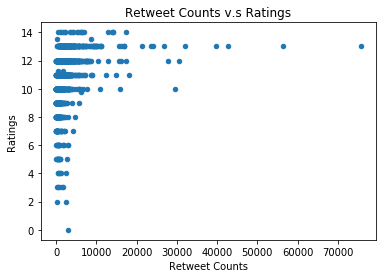

In [71]:
#Insight Three: Check if having the highest rating would have more retweets

df_new2.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts v.s Ratings')

fig = plt.gcf()
fig.savefig('pic2.png',bbox_inches='tight');

In [72]:
#Insight four: check the relationship between the number of ratings and the mean of ratings
df_CountTheNumberOfDogTypes = df_new2.groupby('Types_of_Dog').count()
CountTheNumberOfDogTypes = df_CountTheNumberOfDogTypes['rating']
dogType_mean = df_mean_each_dogTypes['rating']
dogType_mean

Types_of_Dog
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.448276
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher                       11.000000
Eskimo_dog         

In [73]:
df2 = pd.DataFrame()
df2['CountTheNumberOfDogTypes'] = CountTheNumberOfDogTypes
df2['dogType_mean'] = dogType_mean
df2

,CountTheNumberOfDogTypes,dogType_mean
Types_of_Dog,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


In [74]:
#sort the result that we found above

df2['CountTheNumberOfDogTypes'].sort_values()

Types_of_Dog
Scotch_terrier                      1
standard_schnauzer                  1
silky_terrier                       1
clumber                             1
Japanese_spaniel                    1
Irish_wolfhound                     1
EntleBucher                         1
Bouvier_des_Flandres                1
groenendael                         2
black-and-tan_coonhound             2
Sussex_spaniel                      2
Afghan_hound                        2
wire-haired_fox_terrier             2
Appenzeller                         2
Australian_terrier                  2
toy_terrier                         3
komondor                            3
curly-coated_retriever              3
cairn                               3
briard                              3
Tibetan_mastiff                     3
Leonberg                            3
Irish_water_spaniel                 3
Irish_setter                        3
Greater_Swiss_Mountain_dog          3
Brabancon_griffon                   3

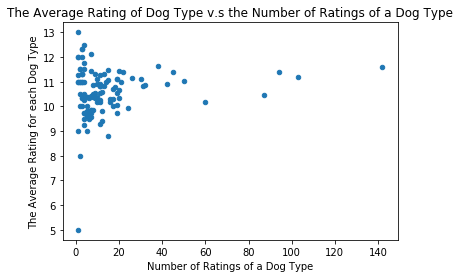

In [75]:
df2.plot(x='CountTheNumberOfDogTypes', y='dogType_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('The Average Rating for each Dog Type')
plt.title('The Average Rating of Dog Type v.s the Number of Ratings of a Dog Type')

fig = plt.gcf()
fig.savefig('pic3.png',bbox_inches='tight');